# Installing impyute library

In [0]:
pip install impyute

# Importing the libraries

In [0]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from impyute.imputation.cs import fast_knn
from statistics import mean, stdev

# Cloning the git repository

In [0]:
!git clone https://github.com/keew13/titanic_survivor_ml.git

Cloning into 'titanic_survivor_ml'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 28 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [0]:
!ls

sample_data  titanic_survivor_ml


In [0]:
!ls titanic_survivor_ml

missing_values.ipynb  README.md  test.csv  train.csv


# Statistical Data Description

In [0]:
train = pd.read_csv("titanic_survivor_ml/train.csv")
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Count of Missing Values in a DataFrame

In [0]:
count_missing = pd.DataFrame(columns = list(train))
temp = []
for i in range(0, len(list(train))):
  temp.append(train.isnull().values[:, [i]].sum())
count_missing = count_missing.append(pd.Series(temp, index = list(train)), ignore_index = True)
print(count_missing)

  PassengerId Survived Pclass Name Sex  ... Parch Ticket Fare Cabin Embarked
0           0        0      0    0   0  ...     0      0    0   687        2

[1 rows x 12 columns]


# Count of Missing Values

In [0]:
features = list(train)
missing = train.isnull().values[:, :]
for i in range(0, len(features)):
  print(f"Missing Value(s) in {features[i]}: {str(missing[:, [i]].sum())}")

Missing Value(s) in PassengerId: 0
Missing Value(s) in Survived: 0
Missing Value(s) in Pclass: 0
Missing Value(s) in Name: 0
Missing Value(s) in Sex: 0
Missing Value(s) in Age: 177
Missing Value(s) in SibSp: 0
Missing Value(s) in Parch: 0
Missing Value(s) in Ticket: 0
Missing Value(s) in Fare: 0
Missing Value(s) in Cabin: 687
Missing Value(s) in Embarked: 2


# Count Graphs to understand how survival depends on different features

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


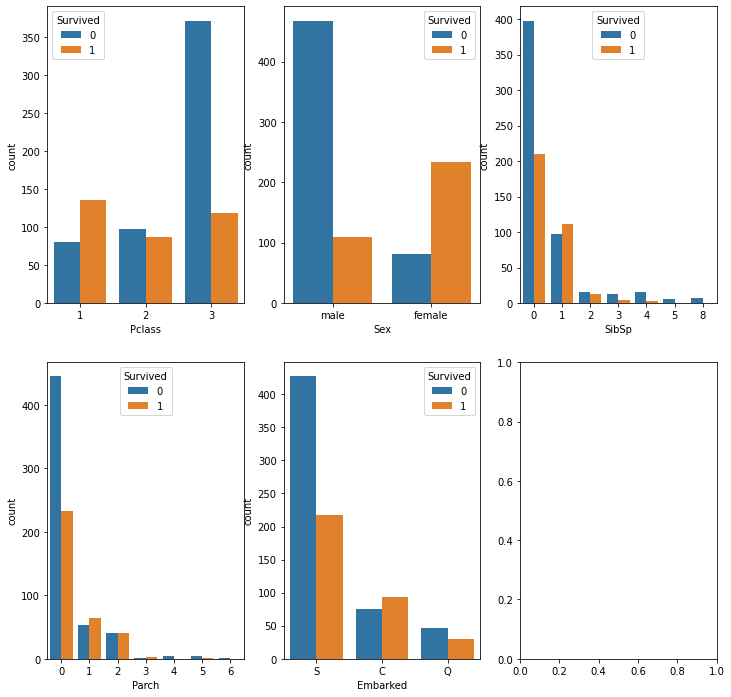

In [0]:
sub_features_comparison = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
sub_plot_shape = (2, 3)
fig, axs = plt.subplots(sub_plot_shape[0], sub_plot_shape[1], figsize=(sub_plot_shape[0]*6, sub_plot_shape[1]*4))
for i in range(0, sub_plot_shape[0]):
  for j in range(0, sub_plot_shape[1]):
    if i==1 and j==2:
      break
    ax = axs[i][j]
    feature = i*sub_plot_shape[1]+j
    sns.countplot(x = train[sub_features_comparison[feature]], hue = train["Survived"], ax = ax)


# Finding missing values using KNN



In [0]:
imputed_train = fast_knn(train.iloc[:, [0, 1, 2, 5, 6, 7, 9]].values, k=30)
imputed_train = pd.DataFrame(imputed_train, index = train.index, columns=train.columns[0:3].append(train.columns[5:8].append(train.columns[9:10])))
imputed_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.000000,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.000000,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.000000,0.0,0.0,13.0000
887,888.0,1.0,1.0,19.000000,0.0,0.0,30.0000
888,889.0,0.0,3.0,29.220526,1.0,2.0,23.4500
889,890.0,1.0,1.0,26.000000,0.0,0.0,30.0000


# Normalizing the dataframe

In [0]:
Norm = lambda dataframe : (dataframe - dataframe.min()) / (dataframe.max() - dataframe.min())

In [0]:
imputed_train["Pclass"] = Norm(imputed_train["Pclass"])
imputed_train["Age"] = Norm(imputed_train["Age"])
imputed_train["SibSp"] = Norm(imputed_train["SibSp"])
imputed_train["Parch"] = Norm(imputed_train["Parch"])
imputed_train["Fare"] = Norm(imputed_train["Fare"])
imputed_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,1.0,0.271174,0.125,0.000000,0.014151
1,2.0,1.0,0.0,0.472229,0.125,0.000000,0.139136
2,3.0,1.0,1.0,0.321438,0.000,0.000000,0.015469
3,4.0,1.0,0.0,0.434531,0.125,0.000000,0.103644
4,5.0,0.0,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...
886,887.0,0.0,0.5,0.334004,0.000,0.000000,0.025374
887,888.0,1.0,0.0,0.233476,0.000,0.000000,0.058556
888,889.0,0.0,1.0,0.361907,0.125,0.333333,0.045771
889,890.0,1.0,0.0,0.321438,0.000,0.000000,0.058556
